# Jonathan Chua's JumpStart DL Project - Predicting Abnormal ECG
While doctors might be used to reading ECGs and interpreting them with extremely high accuracy, reading ECGs are not nearly as straighforward to the layman. With some portable ECG devices already in the market, an automatic ECG interpretation will allow users to know if they should seek further medical advice.
This ECG dataset comprises of over 4000 normal ECGs and 10,000 ECGs, with each data entry representing one heart beat and stored in a normalized array of 187 values. While it is possible to use a RNN to analyze it (and it may well be the best and most efficient method), humans generally analyze ECGs as a 2D graph.
Thus, I aim to build a CNN that will mimick a human doctor to interpret the ECG and determine if it is abnormal.

### Preparing the Dataset
This notebook will focus on visualising the data and preparing the dataset for the model to be trained on

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab Notebooks/JumpStart Intro to Deep Learning'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

### Load Datasets


In [0]:
normal_df = pd.read_csv(f'{root_path}/Raw Data/ptbdb_normal.csv', header=None)
abnormal_df = pd.read_csv(f'{root_path}/Raw Data/ptbdb_abnormal.csv', header=None)
normal_df = normal_df.drop(columns=[187], axis=1, errors='ignore')
abnormal_df = abnormal_df.drop(columns=[187], axis=1, errors='ignore')

In [0]:
print(f"Shape of normal dataset: {normal_df.shape}")
normal_df.head(2)

Shape of normal dataset: (4046, 187)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
0,1.0,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,0.106564,0.106969,0.115883,0.122366,0.122366,0.11953,0.115883,0.122366,0.126013,0.133712,0.134927,0.142626,0.151135,0.158428,0.163695,0.173825,0.188817,0.207861,0.230956,0.258509,0.294571,0.325770,0.362642,0.398298,0.429498,0.449352,0.450972,0.418963,0.372771,0.310373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,0.361781,0.362400,0.366110,0.367965,0.374150,0.37786,0.382189,0.384663,0.398887,0.401361,0.418058,0.443414,0.457638,0.487941,0.520717,0.559678,0.604205,0.634508,0.653680,0.672851,0.678417,0.660482,0.621521,0.555968,0.482375,0.438466,0.378479,0.351268,0.319728,0.306741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
print(f"Shape of abnormal dataset: {abnormal_df.shape}")
abnormal_df.head(2)

Shape of abnormal dataset: (10506, 187)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,0.649870,0.635100,0.655083,0.664639,0.633362,0.746308,0.871416,0.938314,1.000000,0.948740,0.396177,0.000000,0.039096,0.128584,0.305821,0.640313,0.617724,0.537793,0.352737,0.220678,0.256299,0.357950,0.482189,0.570808,0.577758,0.620330,0.622068,0.618593,0.626412,0.612511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,0.125101,0.129136,0.137207,0.137207,0.132365,0.126715,0.158192,0.152542,0.132365,0.168684,0.156578,0.183212,0.191283,0.204197,0.230024,0.244552,0.285714,0.307506,0.321227,0.327684,0.351897,0.373688,0.397094,0.363196,0.340597,0.307506,0.258273,0.197740,0.199354,0.173527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualise how the ECG readings look
There seems to be some visible difference between normal and abnormal ECGs. However, without having a trained eye, it is not easy to tell with confidence


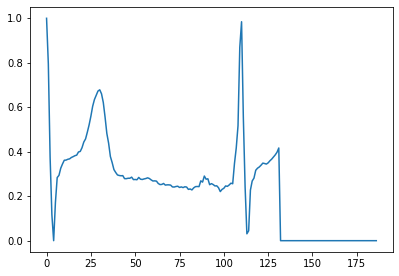

In [0]:
y = normal_df.iloc[374].to_numpy()
x = np.asarray([i for i in range(187)])
plt.figure(figsize=(6.5,4.5))
sns.lineplot(x = x, y = y)

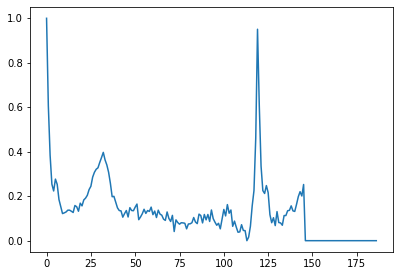

In [0]:
y = abnormal_df.iloc[5509].to_numpy()
x = np.asarray([i for i in range(187)])
plt.figure(figsize=(6.5,4.5))
sns.lineplot(x = x, y = y)

### Converting the seaborn graph into a numpy array that represents image pixels
In order to use a CNN to analyze the ECG graphs, they first have to be saved as black and white images before turning the images in to a numpy array. The ECG will be plotted out with sns before saving the graph in a png file. 



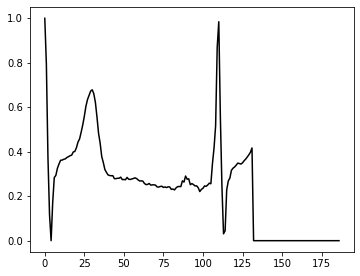

In [0]:
y = normal_df.iloc[1].to_numpy()
plt.figure(figsize=(5.8,4.5))
plot = sns.lineplot(x = np.asarray([i for i in range(187)]), y = y, color='black')
plot.figure.savefig("output.png")

Then, the png file will be cropped to remove the axes to fit into a 299 x 299 pixel file. The final png file will be casted into a ndarray

In [0]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

Initial Size: (417, 324)



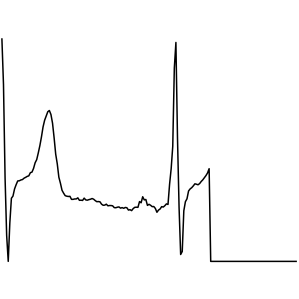


Final Size: (299, 299)

Image to array: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [0]:
im = Image.open("output.png")
print(f"Initial Size: {im.size}\n")

im1 = im.crop((65, 40, 364, 280))
im1 = add_margin(im1, 29, 0, 30, 0, (255, 255, 255)) # pad the image to fit 299 by 299
im1 = im1.convert('L')

display(im1)
print(f"\nFinal Size: {im1.size}\n")
im_arr = np.array(im1)
print(f"Image to array: {im_arr}")

### Process and Save New Dataset
Save every graph into an image onto a google drive folder (this took very long)

In [0]:
def graph_to_png(row, n, folder, n_or_a):
  y = row.to_numpy()
  plt.figure(figsize=(5.8,4.5))
  plot = sns.lineplot(x = np.asarray([i for i in range(187)]), y = y, color='black')
  plot.figure.savefig(f"{root_path}/{folder}/{n_or_a}_graph_{n}.png")
  plt.close()
  
  im = Image.open(f"{root_path}/{folder}/{n_or_a}_graph_{n}.png")
  im1 = im.crop((65, 40, 364, 280))
  im1 = add_margin(im1, 29, 0, 30, 0, (255, 255, 255))
  im1 = im1.convert('L')

  im1.save(f"{root_path}/{folder}/{n_or_a}_graph_{n}.png")

In [0]:
for i in range(4000):
  graph_to_png(normal_df.iloc[i], i, 'normal_graphs', "n")

In [0]:
for i in range(4000):
  graph_to_png(abnormal_df.iloc[i], i, 'abnormal_graphs', "a")

Randomly sample and test if the images were saved correctly


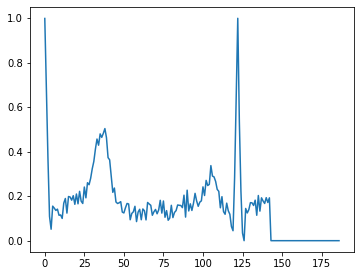

In [0]:
y = abnormal_df.iloc[3464].to_numpy()
x = [i for i in range(187)]
x = np.asarray(x)
plt.figure(figsize=(5.8,4.5))
sns.lineplot(x = x, y = y)

(299, 299)


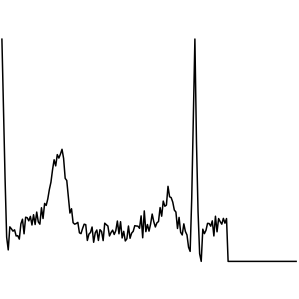

In [0]:
i = 3464
im = Image.open(f"{root_path}/abnormal_graphs/a_graph_{i}.png")
im_arr = np.array(im)/255
im_arr = (np.array(im_arr)*255).astype(np.uint8)
arr2im = Image.fromarray(im_arr)
print(im_arr.shape)
display(arr2im)